# Import

In [1]:
from libraryBantuan.tree import DecisionTree
from libraryBantuan.gameKatla import GameKatla
import numpy as np
import pandas as pd
from collections import Counter
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Library Bantuan

from IPython.display import display
from tqdm import tqdm
from pprint import pprint
import time
import warnings
warnings.filterwarnings('ignore')


# Library Sendiri

# Konstanta
PATH_FILE_TEXT = "D:\\Rama Nitip\\python\\katla\\file text\\"


# Baca Data

In [2]:
daftar_kata = list(pd.read_csv(
    PATH_FILE_TEXT + 'lima huruf katla.csv', header=None)[0])
list_jawaban = random.choices(daftar_kata, k=20)
print(f"Banyak Kata : {len(daftar_kata)}")


Banyak Kata : 8314


# cari jawaban semua kata

In [3]:
DT = DecisionTree(PATH_FILE_TEXT+"semua kata.dictionary")
# jumlah_bertanya = {i: (0, []) for i in range(1, 14)}


In [4]:
jumlah_bertanya = {}

In [5]:
for jawaban in daftar_kata:
    DT.now = DT.root
    pola = DT.getPola(DT.root.tebakan, jawaban)
    tanya = 1

    while pola!='!!!!!':
        tebakan = DT.kata_berikutnya(pola)
        pola    = DT.getPola(tebakan, jawaban)
        tanya  += 1
    
    if tanya in jumlah_bertanya:
        jumlah_bertanya[tanya] = (jumlah_bertanya[tanya][0]+1, jumlah_bertanya[tanya][1]+[jawaban])
    else:
        jumlah_bertanya[tanya] = (1, [jawaban])


,tanya,banyaknya,daftar kata
7,1,1,[sarit]
4,2,101,"[adpis, afkir, afrit, arena, arsap, artik, art..."
2,3,2179,"[abdis, abjat, ablur, abnus, abras, abrin, abr..."
0,4,4361,"[abadi, abaka, abate, abawi, abaya, abbas, abd..."
1,5,1428,"[abang, abdas, abian, abing, abung, abyad, aca..."
3,6,214,"[acang, agung, ajang, ajian, ajung, apung, awa..."
5,7,29,"[anang, babak, bajak, bakak, bazar, celar, gaf..."
6,8,1,[gawar]


<AxesSubplot:xlabel='tanya', ylabel='banyaknya'>

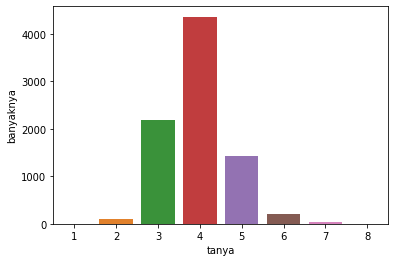

In [6]:
tanya = jumlah_bertanya.keys()
banyaknya = [i[0] for i in list(jumlah_bertanya.values())]
kata = [i[1] for i in list(jumlah_bertanya.values())]

df = pd.DataFrame({'tanya': tanya, 'banyaknya': banyaknya,
                  'daftar kata': kata}).sort_values(by='tanya')
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya'])


In [69]:
DT.kata_berikutnya("?**!?", tampilkan_kandidat=True, awal=True)
DT.kata_berikutnya("?*??*", tampilkan_kandidat=True)
# DT.kata_berikutnya("?**?*", tampilkan_kandidat=True)

['betis', 'etnis', 'fetis', 'getis', 'gutis', 'jetis', 'ketis', 'letis', 'lotis', 'optis', 'petis', 'pitis', 'tekis', 'telis', 'tenis', 'tepis', 'tesis', 'tetis', 'tipis', 'tisik', 'tisis', 'titis', 'tulis', 'tumis']
['tulis']


'tulis'

# Pakai kata yang peluang jadi jawaban saja

,tanya,banyaknya,daftar kata
0,1,1,[sarit]
1,2,197,"[abrip, adpis, afkir, afrit, aktip, albit, amb..."
2,3,2130,"[abdis, ablur, abnus, abras, abrin, absen, abs..."
3,4,3310,"[abadi, abaka, abate, abawi, abaya, abbas, abd..."
4,5,1620,"[abang, abdas, abrar, abuza, abyad, acawi, aci..."
5,6,623,"[acang, adzan, afian, ajing, ajuan, ajung, amp..."
6,7,265,"[ahang, ajian, amung, anyar, babar, babas, bab..."
7,8,103,"[agung, ajang, anian, baban, bahar, bapak, bay..."
8,9,38,"[anang, apung, bawak, bayan, bayar, cacar, gah..."
9,10,17,"[awang, babak, bazar, capar, lawak, lelas, mar..."


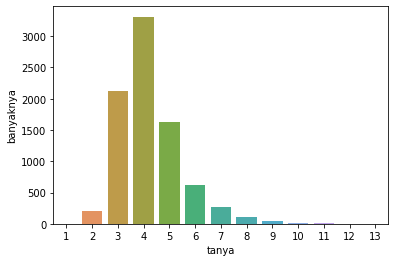

In [ ]:
tanya = jumlah_bertanya.keys()
banyaknya = [i[0] for i in list(jumlah_bertanya.values())]
kata = [i[1] for i in list(jumlah_bertanya.values())]

df = pd.DataFrame({'tanya': tanya, 'banyaknya': banyaknya,
                  'daftar kata': kata}).sort_values(by='tanya')
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya'])


# Huruf yang paling banyak muncul

In [ ]:
all_kata = ''.join(daftar_kata)
huruf_sering = [huruf[0] for huruf in Counter(all_kata).most_common(10)]
huruf_sering


['a', 'e', 'i', 'u', 'k', 'r', 't', 's', 'l', 'n']

In [ ]:
huruf_sering.difference(set(['a', 'b', 'r', 'm']))


{'e', 'i', 'k', 'l', 'n', 's', 't', 'u'}

# Coba

In [ ]:
df = [kata for kata in daftar_kata if len(set(kata)) == 5]
(list_kata1, list_kata2, banyak_sama) = ([], [], [])

for i1 in range(len(df)-1):
    for i2 in range(i1+1, len(df)):
        kata1 = df[i1]
        kata2 = df[i2]
        if len(set(kata1).union(set(kata2))) == 10:
            list_kata1.append(kata1)
            list_kata2.append(kata2)
            banyak_sama.append(len(huruf_sering.intersection(set(kata1))) +
                               len(huruf_sering.intersection(set(kata2)))
                               )


seluruh_hasil = pd.DataFrame(
    {'kata 1': list_kata1, 'kata 2': list_kata2, 'banyak': banyak_sama})
seluruh_hasil


,kata 1,kata 2,banyak
0,abdis,ceguk,6
1,abdis,cekuh,6
2,abdis,cekup,6
3,abdis,cekur,7
4,abdis,cekut,7
...,...,...,...
1146989,yurin,zelot,7
1146990,yurin,zohal,6
1146991,yuris,zelot,7
1146992,yuris,zohal,6


In [ ]:
seluruh_hasil.sort_values(by='banyak', ascending=False)


,kata 1,kata 2,banyak
907400,lekas,rutin,10
926374,likat,senur,10
916858,lerik,nasut,10
457101,eksil,rutan,10
919792,letak,unsri,10
...,...,...,...
374513,decup,mboja,3
511828,fjord,gempa,3
186295,bogem,fidah,3
531379,fyord,gibah,3


# PERBAIKI TREE

In [ ]:
def cari_semua_kemungkinan_pola():
    T = {'0': '*', '1': '?', '2': '!'}
    list_pola = []
    for number in range(3**5):             # total kemungkinan pola : 3 pangkat 5
        ternary = np.base_repr(number, base=3)
        # kasi angka 0 di depan biar sampai 5 digit
        pola = str(ternary).zfill(5)
        list_pola.append(''.join([T[i] for i in pola]))
    return list_pola


semua_pola = cari_semua_kemungkinan_pola()


In [ ]:
def kandidat(tebakan, pola, daf_kata):
    pola_regex = [r"\w"]*5
    huruf_tanda_tanya = [tebakan[i] for i in range(5) if pola[i] == '?']
    huruf_bintang = ''.join([tebakan[i] for i in range(5) if (
        pola[i] == '*') & (tebakan[i] not in huruf_tanda_tanya)])

    # Membentuk pola regex
    for i, p in enumerate(pola):
        if p == '!':
            pola_regex[i] = tebakan[i]
        elif p == '?':
            pola_regex[i] = f"[^ {tebakan[i]+huruf_bintang}]"
        elif p == '*':
            pola_regex[i] = f"[^ {huruf_bintang}]"

    pola_regex = r"".join(pola_regex)
    daf_kata = re.findall(pola_regex, ' '.join(daf_kata))

    # Mengambil kata2 yang ada huruf ?
    list_harus_ada_huruf = [tebakan[i] for i in range(5) if pola[i] == '?']
    new_daf_kata = []
    for kata in daf_kata:
        kata_tanpa_benar = [kata[i] for i in range(5) if pola[i] != '!']
        sudah_benar = True
        for harus_ada_huruf in list_harus_ada_huruf:
            if harus_ada_huruf in kata_tanpa_benar:
                kata_tanpa_benar.remove(harus_ada_huruf)
            else:
                sudah_benar = False
                break
        if sudah_benar:
            new_daf_kata.append(kata)
    return new_daf_kata


In [ ]:
def getPola(tebakan, jawaban):
    list_jawaban = []
    respon_pola = ['*']*5
    for i in range(5):
        if jawaban[i] == tebakan[i]:
            respon_pola[i] = '!'
        else:
            list_jawaban.append(jawaban[i])

    # yellow check / ada tapi salah tempat
    for i in range(5):
        if respon_pola[i] == '!':
            continue
        if tebakan[i] in list_jawaban:
            respon_pola[i] = '?'
            list_jawaban.remove(tebakan[i])
    return ''.join(respon_pola)


In [ ]:
def cari_kata_terbaik(daftar_kata_split, daftar_kata):
    def P(n):
        return n / len(daftar_kata)

    def impurity(n):
        return ((n-1) / n) if n != 0 else 0

    hasil = ("TIDAK ADA", -10000)
    new_daftar_kata_split = []
    impurity_awal = impurity(len(daftar_kata))
    my_set = set(''.join(daftar_kata))

    # Cari kata terbaik
    for kata in daftar_kata_split:
        impurity_akhir = 0
        # kalau tidak ada satupun huruf yg sama dengn daftar kandidat
        if len(my_set.intersection(set(kata))) == 0:
            continue

        daftar_pola = {}

        for kandidat_jawaban in daftar_kata:
            pola = getPola(kata, kandidat_jawaban)
            daftar_pola[pola] = daftar_pola[pola] + \
                1 if pola in daftar_pola else 1

        for pola, n in daftar_pola.items():
            impurity_akhir += P(n)*impurity(n)

        information_gain = impurity_awal - impurity_akhir
        if information_gain > hasil[1]:
            hasil = (kata, information_gain)
        new_daftar_kata_split.append(kata)
    return hasil[0], new_daftar_kata_split


In [ ]:
cari_kata_terbaik(daftar_kata[:100], daftar_kata)


'abrin'

In [ ]:
df_sample = random.choices(daftar_kata, k=1000)
print(len(df_sample))


1000


In [73]:
DT = DecisionTree()
DT.buat_tree(df_sample, pakai_semua_daftar=True)


TypeError: DecisionTree.cari_kata_terbaik() missing 1 required positional argument: 'daftar_kata'

# Cari 2 kata terbaik <br>
jawabannya : lekas rutin


In [50]:
kata12 = set("lekasrutin")
kata3 = []

for kata in daftar_kata:
    if len(kata12.intersection(set(kata))) == 0:
        kata3.append(kata)

print(len(kata3))
print(kata3)


9
['bodoh', 'bomoh', 'dohyo', 'gocoh', 'gogoh', 'gopoh', 'jodoh', 'jompo', 'mbojo']


In [54]:
Counter(all_kata).most_common(15)


[('a', 6505),
 ('e', 3143),
 ('i', 3057),
 ('u', 2844),
 ('k', 2736),
 ('r', 2517),
 ('t', 2246),
 ('s', 2225),
 ('l', 2099),
 ('n', 2083),
 ('o', 1905),
 ('p', 1550),
 ('m', 1522),
 ('b', 1448),
 ('d', 1209)]